In [1]:
# load the data
import pandas as pd
import numpy as np
data = pd.read_csv('data.csv')
data.head()

,V1,V2,labels
0,2.072345,-3.241693,0
1,17.936710,15.784810,0
2,1.083576,7.319176,0
3,11.120670,14.406780,0
4,23.711550,2.557729,0


In [2]:
# define X and y
X = data.drop(['labels'], axis=1)
y = data.loc[:, 'labels']
X.head()

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


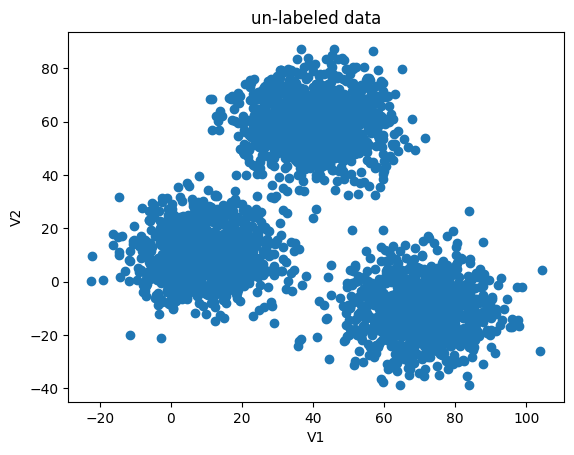

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure()
plt.scatter(X.loc[:, 'V1'], X.loc[:, 'V2'])
plt.title("un-labeled data")
plt.xlabel('V1')
plt.ylabel('V2')
plt.show()

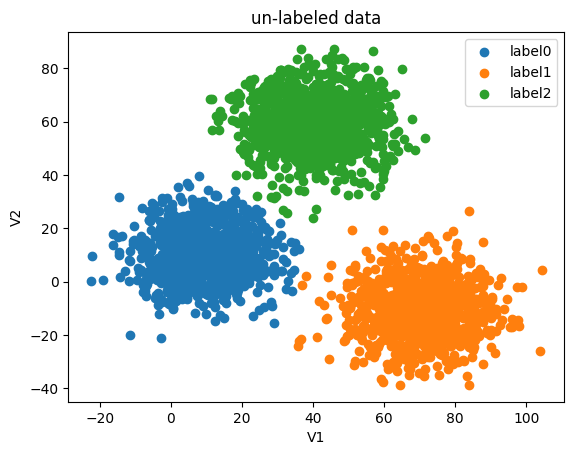

In [17]:
pd.value_counts(y)

fig1 = plt.figure()
label0 = plt.scatter(X.loc[:, 'V1'][y==0], X.loc[:, 'V2'][y==0])
label1 = plt.scatter(X.loc[:, 'V1'][y==1], X.loc[:, 'V2'][y==1])
label2 = plt.scatter(X.loc[:, 'V1'][y==2], X.loc[:, 'V2'][y==2])

plt.title("un-labeled data")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0, label1, label2), ('label0', 'label1', 'label2'))
plt.show()

In [8]:
# set the model
from sklearn.cluster import KMeans
KM = KMeans(n_clusters=3, random_state=0)
KM.fit(X)

C:\Users\IAdmin\Software\Dev_Tools\Anaconda\envs\imooc_ai\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

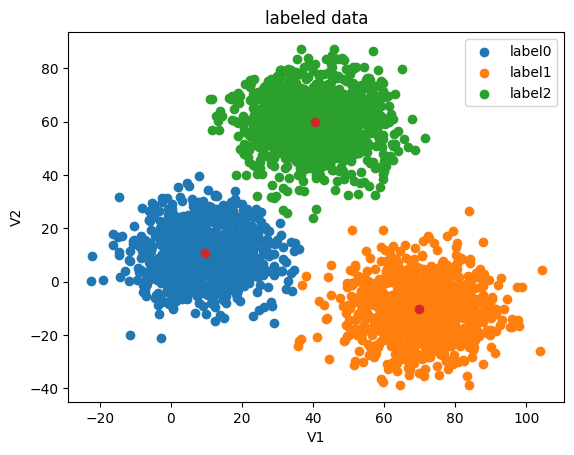

In [22]:
# display the center points(via KMeans approach)
centers = KM.cluster_centers_
fig3 = plt.figure()
label0 = plt.scatter(X.loc[:, 'V1'][y==0], X.loc[:, 'V2'][y==0])
label1 = plt.scatter(X.loc[:, 'V1'][y==1], X.loc[:, 'V2'][y==1])
label2 = plt.scatter(X.loc[:, 'V1'][y==2], X.loc[:, 'V2'][y==2])

plt.title("labeled data")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0, label1, label2), ('label0', 'label1', 'label2'))
plt.scatter(centers[:, 0], centers[:, 1])
plt.show()

In [14]:
# 预测 (80 60)时是哪个 cluster
# test data: V1=80, V2=60
y_predict_test = KM.predict([[80,60]])
print(y_predict_test)

[1]


C:\Users\IAdmin\Software\Dev_Tools\Anaconda\envs\imooc_ai\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [18]:
# predict based on training data
y_predict = KM.predict(X)
print(pd.value_counts(y_predict), pd.value_counts(y))

1    1149
0     952
2     899
Name: count, dtype: int64 labels
2    1156
1     954
0     890
Name: count, dtype: int64


In [20]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y, y_predict)
print(accuracy) # 明显正确率很低

0.0023333333333333335


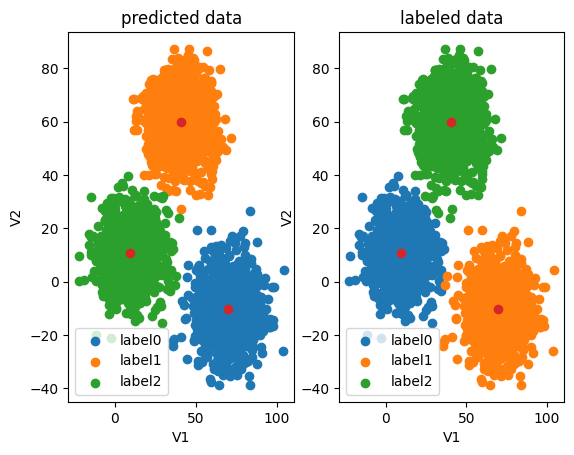

In [23]:
# 使用可视化方式来排错
# visualize the data and results
fig4 = plt.subplot(121)
label0 = plt.scatter(X.loc[:, 'V1'][y_predict==0], X.loc[:, 'V2'][y_predict==0])
label1 = plt.scatter(X.loc[:, 'V1'][y_predict==1], X.loc[:, 'V2'][y_predict==1])
label2 = plt.scatter(X.loc[:, 'V1'][y_predict==2], X.loc[:, 'V2'][y_predict==2])
plt.title("predicted data")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0, label1, label2), ('label0', 'label1', 'label2'))
plt.scatter(centers[:, 0], centers[:, 1])

fig5 = plt.subplot(122)
label0 = plt.scatter(X.loc[:, 'V1'][y==0], X.loc[:, 'V2'][y==0])
label1 = plt.scatter(X.loc[:, 'V1'][y==1], X.loc[:, 'V2'][y==1])
label2 = plt.scatter(X.loc[:, 'V1'][y==2], X.loc[:, 'V2'][y==2])
plt.title("labeled data")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0, label1, label2), ('label0', 'label1', 'label2'))
plt.scatter(centers[:, 0], centers[:, 1])
        
plt.show()

In [26]:
# 发现是无监督学习自己分类错误，改一下标签即可
# correct the result
y_corrected = []
for i in y_predict:
    if i==0:
        y_corrected.append(1)
    elif i==1:
        y_corrected.append(2)
    else:
        y_corrected.append(0)
print(pd.value_counts(y_corrected))

# 转换格式方便打印
y_corrected = np.array(y_corrected)

2    1149
1     952
0     899
Name: count, dtype: int64


In [27]:
print(accuracy_score(y, y_corrected))

0.997


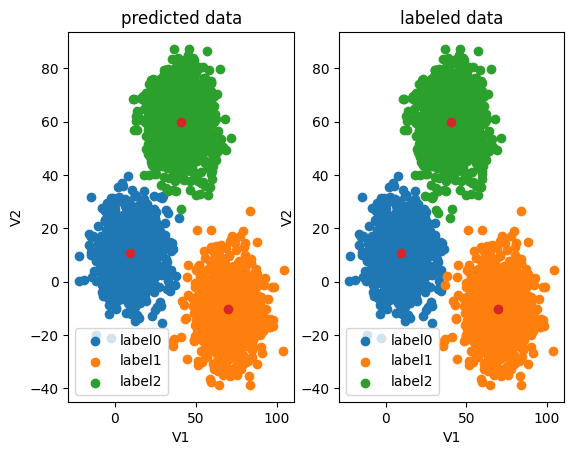

In [28]:
fig6 = plt.subplot(121)
label0 = plt.scatter(X.loc[:, 'V1'][y_corrected==0], X.loc[:, 'V2'][y_corrected==0])
label1 = plt.scatter(X.loc[:, 'V1'][y_corrected==1], X.loc[:, 'V2'][y_corrected==1])
label2 = plt.scatter(X.loc[:, 'V1'][y_corrected==2], X.loc[:, 'V2'][y_corrected==2])
plt.title("predicted data")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0, label1, label2), ('label0', 'label1', 'label2'))
plt.scatter(centers[:, 0], centers[:, 1])

fig7 = plt.subplot(122)
label0 = plt.scatter(X.loc[:, 'V1'][y==0], X.loc[:, 'V2'][y==0])
label1 = plt.scatter(X.loc[:, 'V1'][y==1], X.loc[:, 'V2'][y==1])
label2 = plt.scatter(X.loc[:, 'V1'][y==2], X.loc[:, 'V2'][y==2])
plt.title("labeled data")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0, label1, label2), ('label0', 'label1', 'label2'))
plt.scatter(centers[:, 0], centers[:, 1])
        
plt.show()

In [29]:
# 用 KNN 和 MeanShift 算法重复做一次

#establish a KNN model
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X,y)

KNeighborsClassifier(n_neighbors=3)

C:\Users\IAdmin\Software\Dev_Tools\Anaconda\envs\imooc_ai\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


[2]
knn accuracy:  1.0


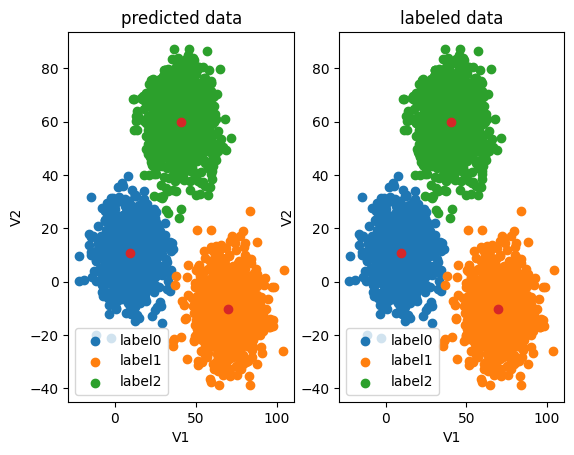

In [34]:
# predict based on the test data V1=80, V2=60
y_predict_knn_test = KNN.predict([[80,60]])
print(y_predict_knn_test)

y_predict_knn = KNN.predict(X)
print("knn accuracy: ", accuracy_score(y,y_predict_knn))

fig8 = plt.subplot(121)
label0 = plt.scatter(X.loc[:, 'V1'][y_predict_knn==0], X.loc[:, 'V2'][y_predict_knn==0])
label1 = plt.scatter(X.loc[:, 'V1'][y_predict_knn==1], X.loc[:, 'V2'][y_predict_knn==1])
label2 = plt.scatter(X.loc[:, 'V1'][y_predict_knn==2], X.loc[:, 'V2'][y_predict_knn==2])
plt.title("predicted data")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0, label1, label2), ('label0', 'label1', 'label2'))
plt.scatter(centers[:, 0], centers[:, 1])

fig9 = plt.subplot(122)
label0 = plt.scatter(X.loc[:, 'V1'][y==0], X.loc[:, 'V2'][y==0])
label1 = plt.scatter(X.loc[:, 'V1'][y==1], X.loc[:, 'V2'][y==1])
label2 = plt.scatter(X.loc[:, 'V1'][y==2], X.loc[:, 'V2'][y==2])
plt.title("labeled data")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0, label1, label2), ('label0', 'label1', 'label2'))
plt.scatter(centers[:, 0], centers[:, 1])
        
plt.show()

In [35]:
# try meanshift model
from sklearn.cluster import MeanShift, estimate_bandwidth
# obtain the bandwidth（Meanshift 算法要指定半径）
bw = estimate_bandwidth(X, n_samples=500)
print(bw)

30.84663454820215


In [37]:
# establish the meanshift model(un-supervised model)
ms = MeanShift(bandwidth=bw)
ms.fit(X)

MeanShift(bandwidth=30.84663454820215)

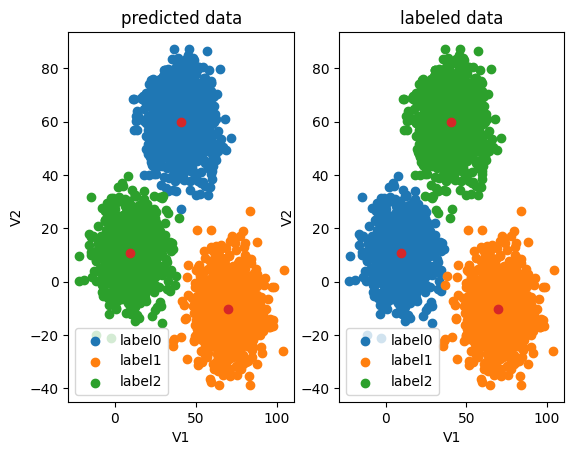

In [40]:
y_predict_ms = ms.predict(X)

fig10 = plt.subplot(121)
label0 = plt.scatter(X.loc[:, 'V1'][y_predict_ms==0], X.loc[:, 'V2'][y_predict_ms==0])
label1 = plt.scatter(X.loc[:, 'V1'][y_predict_ms==1], X.loc[:, 'V2'][y_predict_ms==1])
label2 = plt.scatter(X.loc[:, 'V1'][y_predict_ms==2], X.loc[:, 'V2'][y_predict_ms==2])
plt.title("predicted data")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0, label1, label2), ('label0', 'label1', 'label2'))
plt.scatter(centers[:, 0], centers[:, 1])

fig11 = plt.subplot(122)
label0 = plt.scatter(X.loc[:, 'V1'][y==0], X.loc[:, 'V2'][y==0])
label1 = plt.scatter(X.loc[:, 'V1'][y==1], X.loc[:, 'V2'][y==1])
label2 = plt.scatter(X.loc[:, 'V1'][y==2], X.loc[:, 'V2'][y==2])
plt.title("labeled data")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0, label1, label2), ('label0', 'label1', 'label2'))
plt.scatter(centers[:, 0], centers[:, 1])
        
plt.show()

2    1149
1     952
0     899
Name: count, dtype: int64


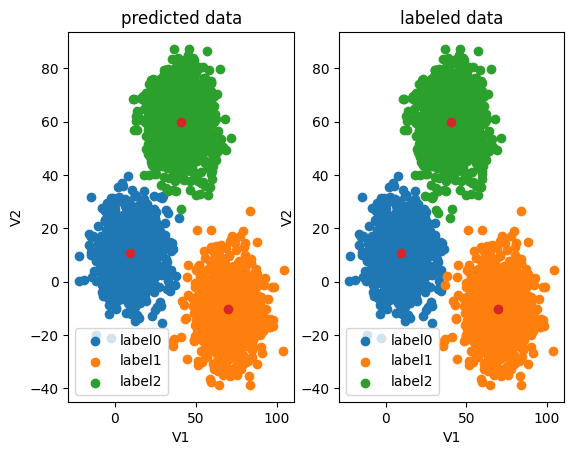

In [44]:
# 发现绿色和蓝色 cluster 错了，也需要矫正一下
# correct the result
y_corrected_ms = []
for i in y_predict_ms:
    if i==0:
        y_corrected_ms.append(2)
    elif i==1:
        y_corrected_ms.append(1)
    else:
        y_corrected_ms.append(0)
print(pd.value_counts(y_corrected_ms))

# 转换格式方便打印
y_corrected_ms = np.array(y_corrected_ms)
fig12 = plt.subplot(121)
label0 = plt.scatter(X.loc[:, 'V1'][y_corrected_ms==0], X.loc[:, 'V2'][y_corrected_ms==0])
label1 = plt.scatter(X.loc[:, 'V1'][y_corrected_ms==1], X.loc[:, 'V2'][y_corrected_ms==1])
label2 = plt.scatter(X.loc[:, 'V1'][y_corrected_ms==2], X.loc[:, 'V2'][y_corrected_ms==2])
plt.title("predicted data")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0, label1, label2), ('label0', 'label1', 'label2'))
plt.scatter(centers[:, 0], centers[:, 1])

fig13 = plt.subplot(122)
label0 = plt.scatter(X.loc[:, 'V1'][y==0], X.loc[:, 'V2'][y==0])
label1 = plt.scatter(X.loc[:, 'V1'][y==1], X.loc[:, 'V2'][y==1])
label2 = plt.scatter(X.loc[:, 'V1'][y==2], X.loc[:, 'V2'][y==2])
plt.title("labeled data")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0, label1, label2), ('label0', 'label1', 'label2'))
plt.scatter(centers[:, 0], centers[:, 1])
        
plt.show()

[0 0 0 ... 1 1 1]
